<div style="background-color: #D50032; padding: 10px; color: white;">
    <img src="https://learn.eaebarcelona.com/branding/_994_1/loginLogo/CustomLoginLogo.png" alt="EAE Business School Logo" style="width: 200px; vertical-align: middle;">
    <div style="font-size: 24px; margin-top: 5px;">
        <span style="color: white; font-size: 24px;text-align: rigth;">Máster Big Data - Data Science</span><br><br>
        <strong><span style="color: white; font-size: 24px;text-align: left">Nicolás Tornería</span></strong>
    </div>
</div>

<div style="background-color: #F8F8F8; padding: 20px; font-size: 36px; text-align: Left; color: #000000;">
    <strong> Practica 3.3 </strong>
</div>
    
</div>


La bodega australiana Wineaguirre ha decidido diversificar su modelo 
de negocio incorporando dos nuevas líneas estratégicas: 
1. Enoturismo: organización de visitas guiadas a sus viñedos y 
bodega histórica. 
2. E-commerce vitivinícola: apertura de una tienda online para 
comercializar sus propios vinos y los de otras bodegas 
asociadas.

Wineaguirre solicita nuestra colaboración para responder a la 
siguiente pregunta: 

¿Existen diferencias químicas sistemáticas entre los vinos tintos y 
los vinos blancos que permitan diferenciarlos más allá del color y 
el gusto? ¿Tienen algún patrón químico distinto? 


Para ello, se espera que desarrollemos un modelo de clasificación, 
utilizando un algoritmo de regresión logística, que permita 
distinguir entre ambos tipos de vino basándose exclusivamente en sus 
características químicas.

## Importación de librerías de Python.


In [125]:
### importar librerias
import pandas as pd
import seaborn as sns # importamos la libreria seaborn para graficar
import matplotlib.pyplot as plt # importamos la libreria matplotlib para graficar
from sklearn.linear_model import LogisticRegression # importamos la libreria de regresion logistica
from sklearn.model_selection import train_test_split # importamos la libreria para dividir los datos
from sklearn import metrics # importamos las librerias necesarias para la matriz de confucion y el reporte de clasificacion
from sklearn.preprocessing import StandardScaler # importamos la libreria para normalizar los datos
import numpy as np
from sklearn.metrics import accuracy_score

##  Carga y revisión del conjunto de datos.

In [126]:
## Cargar las libreria de wine quality red

winequality_red = pd.read_csv(r"C:\Users\Claudio\OneDrive\Escritorio\EAE\Data Science\Practica3.3\3.3.Datos\3.2.winequality\winequality-red.csv",delimiter=";" )
print(winequality_red.head(5)) #imprime las primeras 5 filas del dataframe


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [127]:
## Cargar las libreria de wine quality white

winequality_white = pd.read_csv(r"C:\Users\Claudio\OneDrive\Escritorio\EAE\Data Science\Practica3.3\3.3.Datos\3.2.winequality\winequality-white.csv",delimiter=";")
print(winequality_white.head(5)) # Verificamos que se han cargado correctamente los datos


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [128]:
# cual es la forma de los dataframes
print(winequality_red.shape) # (1599, 12)
print(winequality_white.shape) # (4898, 12)


(1599, 12)
(4898, 12)


In [129]:
### obtener info de los DF cargados
winequality_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [130]:
# cargar la info DF
winequality_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [131]:
# hay valores nulos?
print(winequality_red.isnull().sum()) # no hay valores nulos
print(winequality_white.isnull().sum()) # no hay valores nulos

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [132]:
# hay valores duplicados?
print(winequality_red.duplicated().sum()) 
print(winequality_white.duplicated().sum()) # hay duplicados en el DF de vino blanco 937 duplicados pero no tienen un ID que los identifique no se pueden saber si son iguales o no o si son diferentes.


240
937


 ### Juntar los DF de vino rojo y vino blanco para un mejor entendimiento y poner un valor de 0 y 1 dependiendo si es rojo o blanco

In [133]:
# juntar los dos dataframes 
winequality_red['type'] = 'red' # añadimos una columna para identificar el tipo de vino
winequality_white['type'] = 'white' # añadimos una columna para identificar el tipo de vino
winequality = pd.concat([winequality_red, winequality_white], axis=0) # unimos los dos dataframes
print(winequality.shape) # (6497, 13) # ahora tenemos un dataframe con los dos tipos de vino
# ver la info del nuevo dataframe
winequality.info() # (6497, 13) # ahora tenemos un dataframe con los dos tipos de vino

(6497, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [134]:
print(winequality.head(5)) # ver las primeras 5 filas del nuevo dataframe

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2    

variable objetivo:  como saber si el vino es blanco o rojo. 

 ### Red = 0 y White = 1

In [135]:
# cambiamos la columna type por una columna si el vino es rojo = 0 y blanco = 1
winequality['type'] = winequality['type'].map({'red': 0, 'white': 1}) # cambiamos el tipo de vino por un numero
print(winequality.head(5)) # ver las primeras 5 filas del nuevo dataframe

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2 

In [136]:
print(winequality["type"])

0       0
1       0
2       0
3       0
4       0
       ..
4893    1
4894    1
4895    1
4896    1
4897    1
Name: type, Length: 6497, dtype: int64


## Análisis Exploratorio de los datos

- Explorar la distribución de las variables. 
- Detectar patrones o relaciones entre variables. 
- Identificar diferencias visuales entre vinos blancos y tintos. 
- Incluir visualizaciones significativas (boxplots, histogramas, 
pairplots, etc.) a lo largo del EDA.

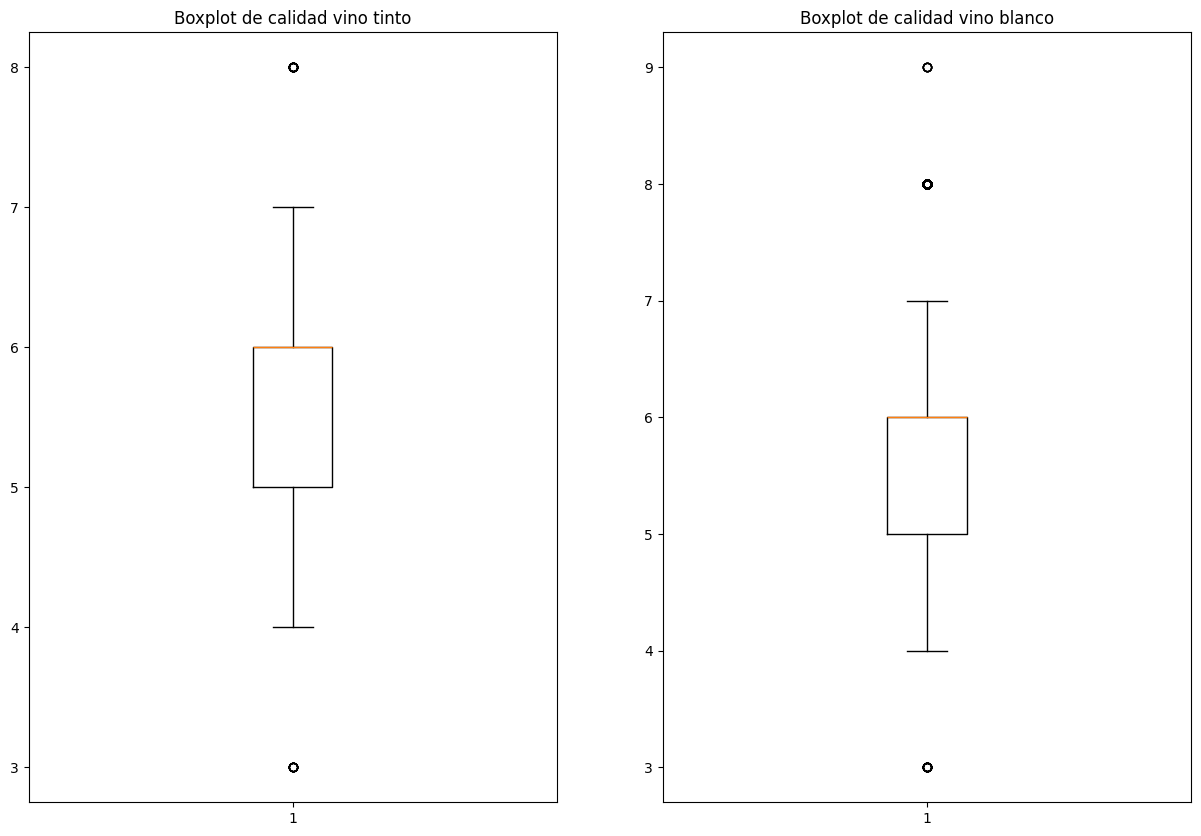

In [137]:
# grafico boxplot para ver los outliers de la calidad de los vinos
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.boxplot(winequality_red['quality'])
plt.title('Boxplot de calidad vino tinto')
plt.subplot(1,2,2)
plt.boxplot(winequality_white['quality'])
plt.title('Boxplot de calidad vino blanco')
plt.show() # mostramos el grafico


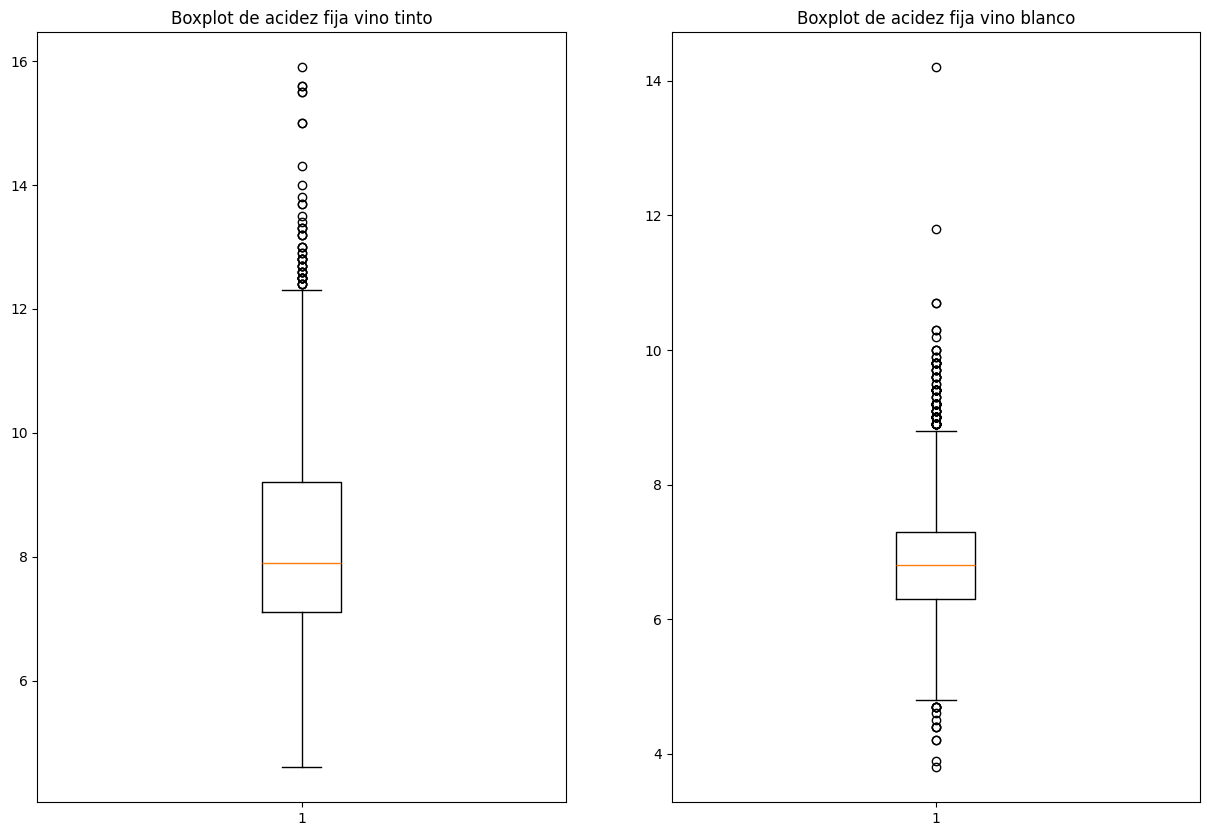

In [138]:
# grafico de boxplot para ver los outliers 
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.boxplot(winequality_red['fixed acidity'])
plt.title('Boxplot de acidez fija vino tinto')
plt.subplot(1,2,2)
plt.boxplot(winequality_white['fixed acidity'])
plt.title('Boxplot de acidez fija vino blanco')
plt.show() # mostramos el grafico

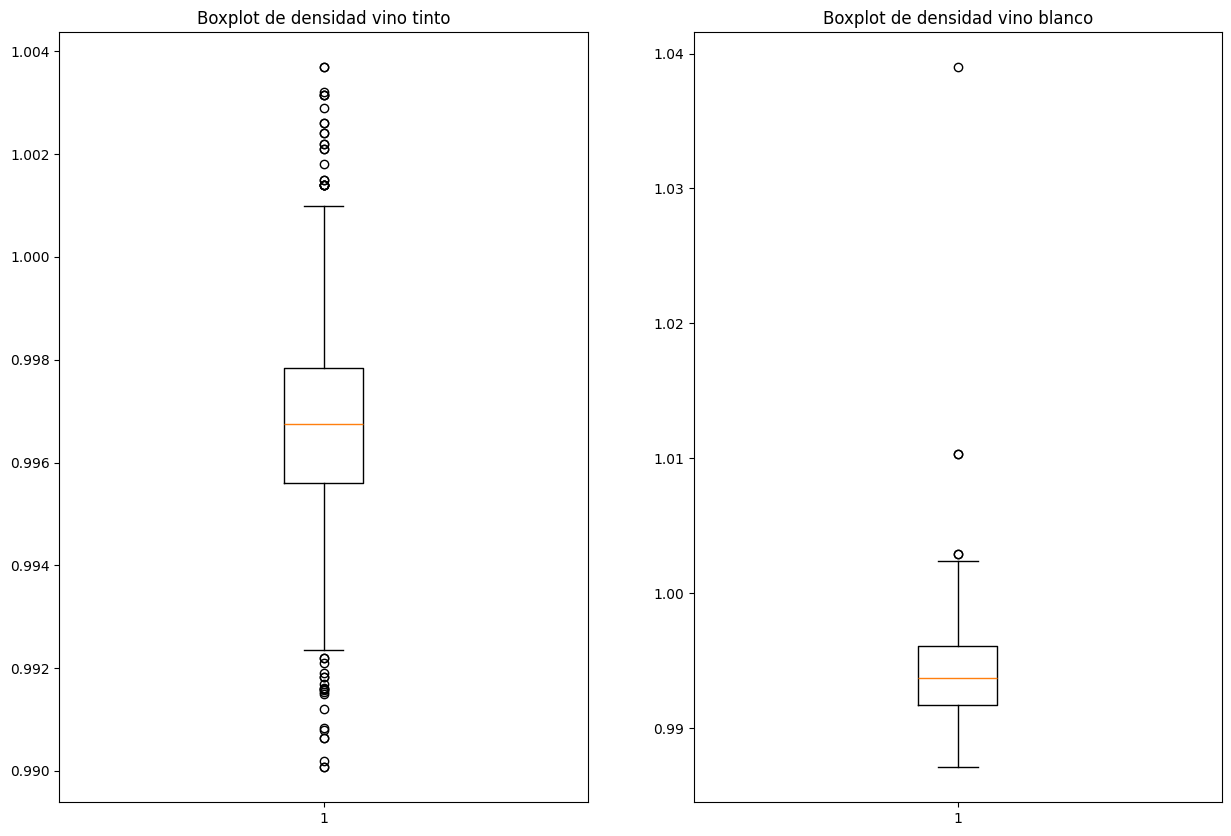

In [139]:
# grafico de boxplot para ver los outliers de la densidad 
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.boxplot(winequality_red['density'])
plt.title('Boxplot de densidad vino tinto')
plt.subplot(1,2,2)
plt.boxplot(winequality_white['density'])
plt.title('Boxplot de densidad vino blanco')
plt.show() # mostramos el grafico

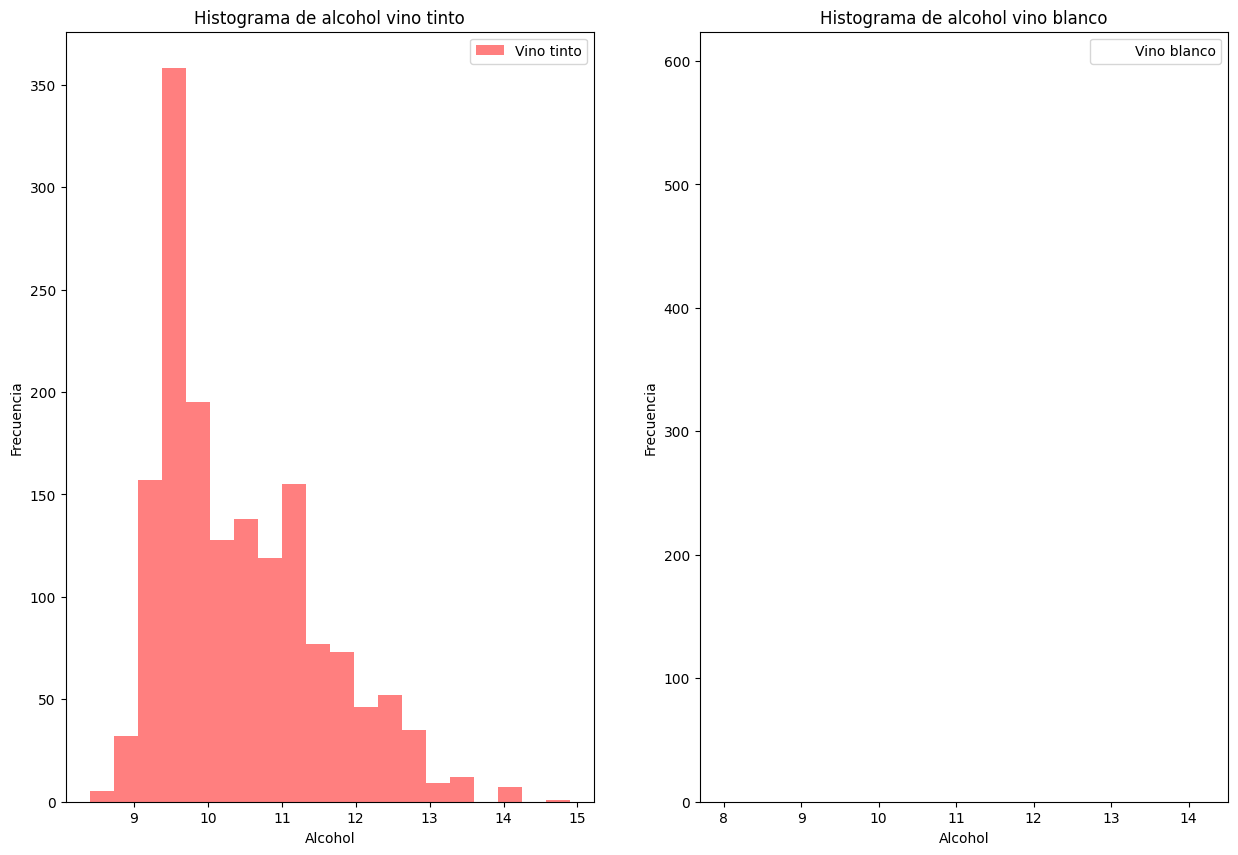

In [140]:
# Grafico de histograma para ver la distribucion de alcohol 
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.hist(winequality_red['alcohol'], bins=20, color='red', alpha=0.5, label='Vino tinto')
plt.title('Histograma de alcohol vino tinto')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.legend()
plt.subplot(1,2,2)
plt.hist(winequality_white['alcohol'], bins=20, color='white', alpha=0.5, label='Vino blanco')
plt.title('Histograma de alcohol vino blanco')
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.legend()
plt.show() # mostramos el grafico

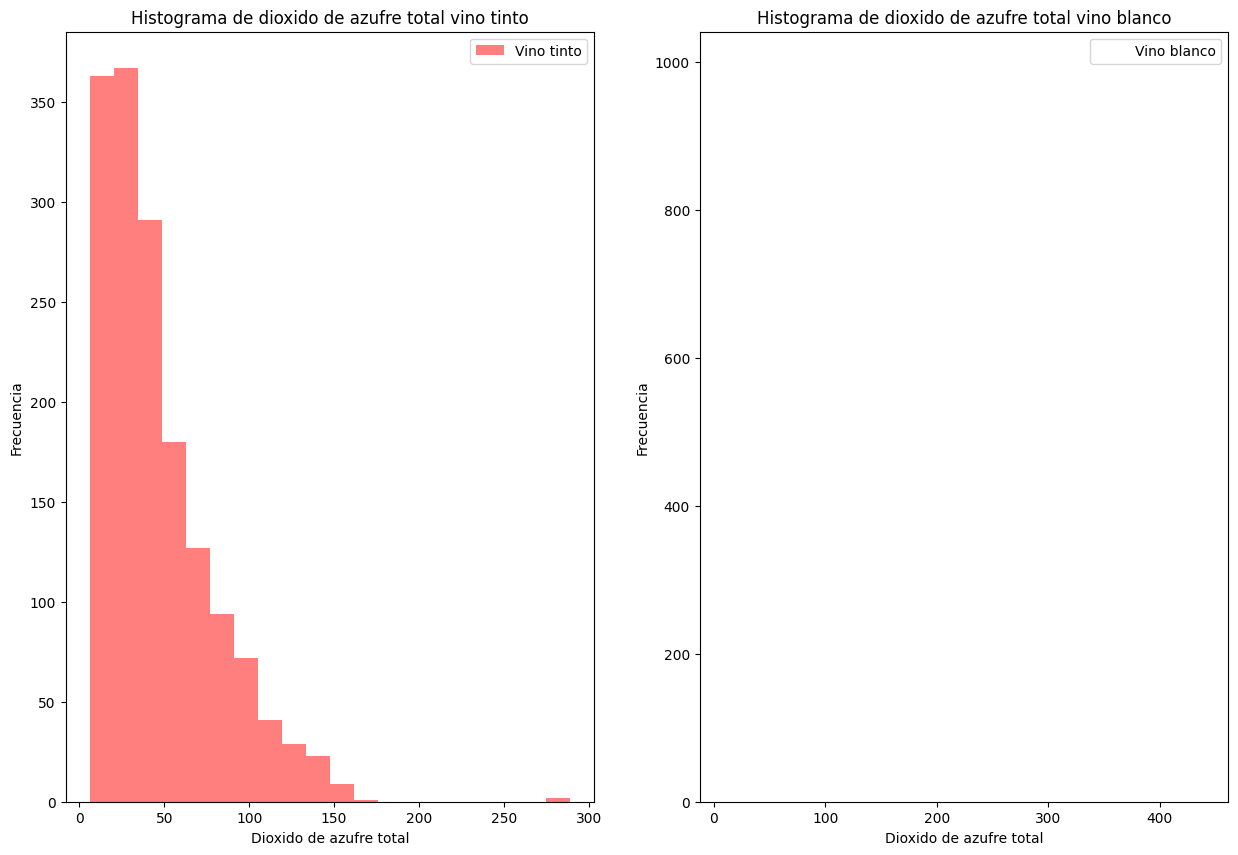

In [141]:
# Grafico de histograma para ver la distribucion de total sulfur dioxide
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.hist(winequality_red['total sulfur dioxide'], bins=20, color='red', alpha=0.5, label='Vino tinto')
plt.title('Histograma de dioxido de azufre total vino tinto')
plt.xlabel('Dioxido de azufre total')
plt.ylabel('Frecuencia')
plt.legend()
plt.subplot(1,2,2)
plt.hist(winequality_white['total sulfur dioxide'], bins=20, color='white', alpha=0.5, label='Vino blanco')
plt.title('Histograma de dioxido de azufre total vino blanco')
plt.xlabel('Dioxido de azufre total')
plt.ylabel('Frecuencia')
plt.legend()
plt.show() # mostramos el grafico

## Preprocesamiento de los datos:

Realizar todas las tareas necesarias para dejar el dataset listo 
para pasar al proceso de modelado. Por ejemplo: 

● Relleno o eliminación de valores nulos. 

● Tratamiento de outliers. 

● Eliminación de columnas irrelevantes. 

● Transformación de variables si es necesario. 

● Codificación si hay variables categóricas. 

● Estandarización o normalización de variables. 

In [142]:
print(winequality.value_counts()) # vemos la cantidad de vinos por calidad

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality  type
7.0            0.150             0.28         14.7            0.051      29.0                 149.0                 0.99792  2.96  0.39       9.0      7        1       8
7.3            0.190             0.27         13.9            0.057      45.0                 155.0                 0.99807  2.94  0.41       8.8      8        1       8
6.8            0.180             0.30         12.8            0.062      19.0                 171.0                 0.99808  3.00  0.52       9.0      7        1       7
7.4            0.160             0.30         13.7            0.056      33.0                 168.0                 0.99825  2.90  0.44       8.7      7        1       7
                                 0.27         15.5            0.050      25.0                 135.0                 0.99840  2.90  0.43       8.7      7   

In [143]:
# eliminar duplicados del DF 
winequality = winequality.drop_duplicates() # eliminamos los duplicados
print(winequality.duplicated().sum()) # ahora no hay duplicados


0


In [144]:
print(winequality.value_counts()) # verificamos

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality  type
15.9           0.360             0.65         7.5             0.096      22.0                 71.0                  0.99760  2.98  0.84       14.9     5        0       1
3.8            0.310             0.02         11.1            0.036      20.0                 114.0                 0.99248  3.75  0.44       12.4     6        1       1
3.9            0.225             0.40         4.2             0.030      29.0                 118.0                 0.98900  3.57  0.36       12.8     8        1       1
4.2            0.170             0.36         1.8             0.029      93.0                 161.0                 0.98999  3.65  0.89       12.0     7        1       1
               0.215             0.23         5.1             0.041      64.0                 157.0                 0.99688  3.42  0.44       8.0      3   

In [145]:
# tratamiento de outliers vistos en los graficos
# eliminar outliers de la calidad de total sulfur dioxide del df winequality
winequality = winequality[(winequality['total sulfur dioxide'] < 200) & (winequality['total sulfur dioxide'] > 0)] # eliminamos los outliers de la calidad de total sulfur dioxide
# descripcion de winequality['total sulfur dioxide']
print(winequality['total sulfur dioxide'].describe()) # ahora tenemos un dataframe con los dos tipos de vino


count    4989.000000
mean      106.916817
std        50.655240
min         6.000000
25%        70.000000
50%       112.000000
75%       146.000000
max       199.000000
Name: total sulfur dioxide, dtype: float64


In [146]:
# columnas numericas
numerical_columns = winequality.select_dtypes(include=['int64', 'float64']).columns.tolist() # seleccionamos las columnas numericas
print(numerical_columns) # vemos las columnas numericas


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


In [147]:
# remover type de las columnas numericas 
numerical_columns.remove('type') # removemos la columna type de las columnas numericas
print(numerical_columns) # vemos las columnas numericas sin la columna type

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [148]:
# vemos la descripcion de las columnas numericas
winequality[numerical_columns].describe() # vemos la descripcion de las columnas numericas


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,7.231880,0.346024,0.315380,4.739828,0.056943,28.471537,106.916817,0.994397,3.227681,0.534207,10.612721,5.819002
std,1.347254,0.171386,0.147194,4.330540,0.037177,16.251019,50.655240,0.002965,0.161278,0.152898,1.184080,0.883734
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.700000,0.037000,16.000000,70.000000,0.992020,3.120000,0.430000,9.600000,5.000000
50%,7.000000,0.300000,0.310000,2.600000,0.047000,27.000000,112.000000,0.994400,3.220000,0.510000,10.500000,6.000000
75%,7.700000,0.415000,0.390000,6.700000,0.068000,39.000000,146.000000,0.996600,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,112.000000,199.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Análisis de las correlaciones:

Utilizar la librería Seaborn para construir un heatmap con la 
matriz de correlación. 

● El gráfico debe contener el título: “Correlación entre 
variables”. 

● A partir del análisis del gráfico, se debe tomar una decisión 
sobre si conviene omitir alguna variable del conjunto de 
entrada que recibirá el modelo.

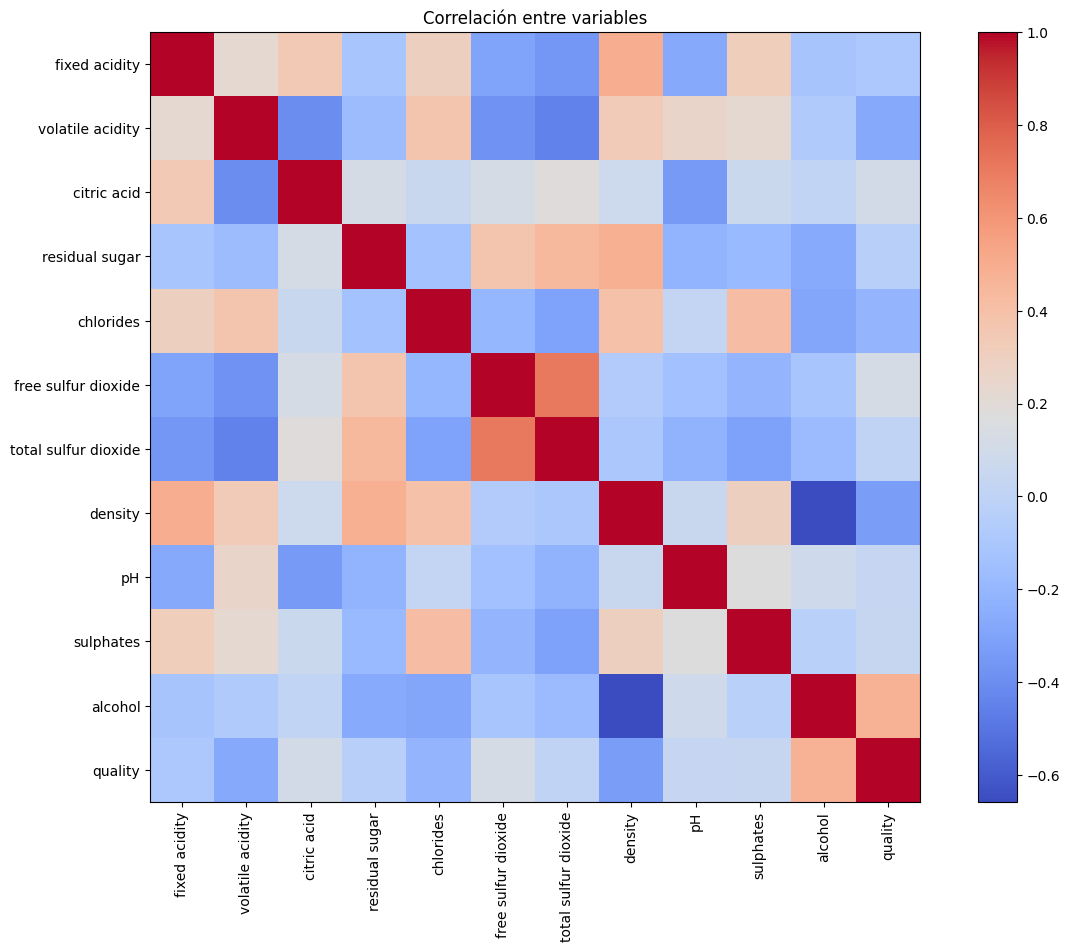

In [149]:
# Matrix de correlacion de las columnas numericas
plt.figure(figsize=(15,10)) # tamaño de la figura
plt.title('Correlación entre variables') # titulo de la figura
plt.imshow(winequality[numerical_columns].corr(), cmap='coolwarm', interpolation='none') # matriz de correlacion
plt.colorbar() # barra de color
plt.xticks(range(len(numerical_columns)), numerical_columns, rotation=90) # etiquetas de los ejes x
plt.yticks(range(len(numerical_columns)), numerical_columns) # etiquetas de los ejes y
plt.show() # mostramos el grafico



In [150]:
# el mismo grafico de antes pero con los numeros de correlacion 
correlation_matrix = winequality[numerical_columns].corr() # calculamos la matriz de correlacion
correlation_matrix.style.background_gradient(cmap="RdBu_r").format(precision=2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,0.22,0.34,-0.11,0.30,-0.30,-0.36,0.50,-0.27,0.31,-0.12,-0.09
volatile acidity,0.22,1.00,-0.40,-0.17,0.37,-0.38,-0.45,0.33,0.26,0.23,-0.07,-0.27
citric acid,0.34,-0.40,1.00,0.12,0.06,0.12,0.18,0.08,-0.34,0.06,0.01,0.11
residual sugar,-0.11,-0.17,0.12,1.00,-0.13,0.37,0.44,0.48,-0.21,-0.18,-0.26,-0.04
chlorides,0.30,0.37,0.06,-0.13,1.00,-0.20,-0.30,0.39,0.03,0.42,-0.29,-0.21
free sulfur dioxide,-0.30,-0.38,0.12,0.37,-0.20,1.00,0.71,-0.06,-0.14,-0.21,-0.11,0.12
total sulfur dioxide,-0.36,-0.45,0.18,0.44,-0.30,0.71,1.00,-0.10,-0.22,-0.31,-0.18,0.01
density,0.50,0.33,0.08,0.48,0.39,-0.06,-0.10,1.00,0.06,0.30,-0.66,-0.33
pH,-0.27,0.26,-0.34,-0.21,0.03,-0.14,-0.22,0.06,1.00,0.17,0.08,0.03
sulphates,0.31,0.23,0.06,-0.18,0.42,-0.21,-0.31,0.30,0.17,1.00,-0.02,0.04


## Entrenamiento y evaluación de un modelo de regresión logística:

Algunas tareas a incluir en este apartado podrían ser: 

● Definir las variables independientes (X) y la variable 
objetivo (y). 

● Dividir el conjunto de datos en entrenamiento (75%) y test 
(25%). 

● Entrenar el modelo y evaluar su desempeño a través de la 
accuracy y la matriz de confusión. 

In [151]:
# Primero se extrae la variable objetivo. 
target = winequality.pop("type") # extraemos la variable objetivo


Dividimos los datos de la matriz de variables independientes y el array con los valores de la variable dependiente en train y test.

Una vez tenemos los datos preparados, dividimos los registros del dataframe en dos subconjuntos (entrenamiento [75%] y test [25%]). Asimismo, dividimos cada subconjunto a su vez en dos conjuntos de columnas, separamos las variables predictoras de la variable objetivo. Para llevar a cabo todas estas divisiones hacemos uso de la función train_test_split procedente del paquete sklearn.model_selection.

In [152]:
# dividimos los registros del dataframe en dos subconjuntos (entrenamiento [75%] y test [25%]).

X_train, X_test, y_train, y_test = train_test_split(winequality, target) # dividimos los datos en entrenamiento y test

In [153]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3823,6.7,0.26,0.49,8.10,0.052,48.0,197.0,0.99558,3.19,0.48,9.5,5
1430,7.4,0.41,0.24,1.80,0.066,18.0,47.0,0.99560,3.37,0.62,10.4,5
2152,7.0,0.22,0.33,2.10,0.052,15.0,76.0,0.99300,3.20,0.41,10.6,6
42,7.5,0.49,0.20,2.60,0.332,8.0,14.0,0.99680,3.21,0.90,10.5,6
1993,7.4,0.30,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1571,6.4,0.38,0.14,2.20,0.038,15.0,25.0,0.99514,3.44,0.65,11.1,6
1995,8.4,0.20,0.38,11.80,0.055,51.0,170.0,1.00040,3.34,0.82,8.9,6
816,8.4,0.18,0.42,5.10,0.036,7.0,77.0,0.99390,3.16,0.52,11.7,5
1862,7.3,0.13,0.31,2.30,0.054,22.0,104.0,0.99240,3.24,0.92,11.5,7


In [154]:
y_train

3823    1
1430    0
2152    1
42      0
1993    1
       ..
1571    0
1995    1
816     1
1862    1
1192    0
Name: type, Length: 3741, dtype: int64

In [155]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
530,6.4,0.100,0.35,4.9,0.048,31.0,103.0,0.99470,3.43,0.79,9.7,6
1268,7.6,0.310,0.29,10.5,0.040,21.0,145.0,0.99660,3.04,0.35,9.4,5
825,7.1,0.460,0.14,2.8,0.076,15.0,37.0,0.99624,3.36,0.49,10.7,5
104,7.2,0.490,0.24,2.2,0.070,5.0,36.0,0.99600,3.33,0.48,9.4,5
1482,6.7,0.160,0.49,2.4,0.046,57.0,187.0,0.99520,3.62,0.81,10.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
345,7.1,0.145,0.33,4.6,0.050,33.0,131.0,0.99420,3.28,0.40,9.6,6
2881,7.2,0.210,0.28,2.7,0.033,38.0,94.0,0.99075,2.99,0.43,11.8,7
1171,8.2,0.610,0.45,5.4,0.030,15.0,118.0,0.99540,3.14,0.34,9.6,5
1406,8.2,0.240,0.34,5.1,0.062,8.0,22.0,0.99740,3.22,0.94,10.9,6


In [156]:
y_test

530     1
1268    1
825     0
104     0
1482    1
       ..
345     1
2881    1
1171    1
1406    0
841     1
Name: type, Length: 1248, dtype: int64

In [157]:
# fijamos un seed para la reproducibilidad de los resultados
random_seed = 42 # fijamos un seed para la reproducibilidad de los resultados

In [158]:
X_train, X_test, y_train, y_test = train_test_split(winequality, target, random_state=random_seed)

## Estandarizamos los Datos

In [159]:
# Normalizamos los datos
scaler = StandardScaler() # creamos el objeto scaler
X_train_stn = scaler.fit_transform(X_train) # normalizamos los datos de entrenamiento
X_test_stn = scaler.transform(X_test) # normalizamos los datos de test
print(X_train_stn) # mostramos los datos de entrenamiento normalizados
print(X_test_stn) # mostramos los datos de test normalizados



[[-1.0599469  -0.91364066  0.09596271 ... -0.76492416  0.5812335
   1.30977931]
 [-0.23647871  1.36213928 -0.77538798 ... -0.29371576  0.9211938
  -0.92863293]
 [-0.16161796  1.59555261 -1.44565773 ...  0.51407006 -1.20355804
  -0.92863293]
 ...
 [ 0.51212874  0.6618993   0.56515154 ...  0.58138554 -0.94858782
  -0.92863293]
 [-0.53592169 -0.56352067  1.23542129 ... -0.5629777  -1.20355804
  -0.92863293]
 [ 1.26073618 -0.15504735 -0.03809125 ...  0.11017715 -0.18367716
   0.19057319]]
[[-0.61078243 -0.621874   -0.1721452  ... -0.5629777  -0.94858782
  -0.92863293]
 [-1.20966839 -0.91364066 -0.37322612 ... -1.10150158  0.24127321
   1.30977931]
 [ 0.06296427 -0.38846067  0.29704363 ...  1.72574879 -0.86359775
   0.19057319]
 ...
 [ 3.43169777 -0.09669401  1.16839432 ...  1.52380233  0.07129306
   1.30977931]
 [ 0.2875465  -0.44681401 -0.4402531  ... -0.22640028 -0.6936176
   0.19057319]
 [-0.31133945 -0.56352067  0.43109758 ...  0.37943909 -0.3536573
   0.19057319]]


In [160]:
# Comprobamos si los datos han sido normalizados
wine = pd.DataFrame(X_train_stn, columns=winequality.columns)
wine.describe().T # mostramos la descripcion de los datos normalizados

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3741.0,-3.523274e-16,1.000134,-2.557162,-0.610782,-0.161618,0.362407,6.276406
volatile acidity,3741.0,-1.120610e-16,1.000134,-1.555527,-0.680227,-0.271754,0.399309,7.197472
citric acid,3741.0,4.055089e-16,1.000134,-2.115927,-0.507280,-0.038091,0.565152,9.010550
residual sugar,3741.0,-5.223182e-18,1.000134,-0.954284,-0.701550,-0.494767,0.470219,14.025973
chlorides,3741.0,-1.415008e-16,1.000134,-1.253601,-0.546022,-0.262990,0.303073,15.700001
free sulfur dioxide,3741.0,-5.698017e-18,1.000134,-1.684815,-0.759624,-0.081151,0.597322,5.161596
total sulfur dioxide,3741.0,-9.686629e-17,1.000134,-1.994166,-0.708917,0.101778,0.754288,1.822033
density,3741.0,-1.602140e-14,1.000134,-2.471656,-0.787786,0.006429,0.756331,15.202167
pH,3741.0,6.419766e-16,1.000134,-3.123295,-0.671236,-0.058221,0.616095,4.784596
sulphates,3741.0,-1.329537e-17,1.000134,-2.111234,-0.697609,-0.159085,0.446755,9.736291


### Definimos y entrenamos un modelo predictivo a partir del algoritmos de regresión logística.

In [161]:
# definimos la regresion logistica
lr = LogisticRegression()

In [162]:
lr.fit(X_train_stn, y_train) # Entrenamiento: se ajustan los parámetros de la regresión logística en función de los datos.

LogisticRegression()

In [163]:
# ¿ Informacion de la regresion ?
print(lr.coef_) # mostramos los coeficientes de la regresion logistica
print(lr.intercept_) # mostramos el intercepto de la regresion logistica
print(lr.classes_) # mostramos las clases de la regresion logistica
print(lr.n_iter_) # mostramos el numero de iteraciones de la regresion logistica
print(lr.n_features_in_) # mostramos el numero de features de la regresion logistica
print(lr.n_jobs) # mostramos el numero de jobs de la regresion logistica
print(lr.solver) # mostramos el solver de la regresion logistica
print(lr.tol) # mostramos el tolerancia de la regresion logistica
print(lr.max_iter) # mostramos el maximo de iteraciones de la regresion logistica



[[-0.61672188 -1.28487341  0.43996415  2.55395135 -1.05371982 -1.01060186
   2.901255   -2.86088333 -0.55423062 -0.73537573 -0.79528185 -0.20113041]]
[3.4710515]
[0 1]
[18]
12
None
lbfgs
0.0001
100


## Evaluación del rendimiento del modelo.

In [164]:
# Evaluamos el modelo
lr.score(X_test_stn, y_test) # mostramos el score del modelo

0.9943910256410257

La Accuracy del modelo es del 99.4% con los dato de entrenamiento

In [165]:
X_test_stn

array([[-0.61078243, -0.621874  , -0.1721452 , ..., -0.5629777 ,
        -0.94858782, -0.92863293],
       [-1.20966839, -0.91364066, -0.37322612, ..., -1.10150158,
         0.24127321,  1.30977931],
       [ 0.06296427, -0.38846067,  0.29704363, ...,  1.72574879,
        -0.86359775,  0.19057319],
       ...,
       [ 3.43169777, -0.09669401,  1.16839432, ...,  1.52380233,
         0.07129306,  1.30977931],
       [ 0.2875465 , -0.44681401, -0.4402531 , ..., -0.22640028,
        -0.6936176 ,  0.19057319],
       [-0.31133945, -0.56352067,  0.43109758, ...,  0.37943909,
        -0.3536573 ,  0.19057319]])

In [166]:
# Aplicamos el mismo model a los datos de test
predictions = lr.predict(X_test_stn) # predecimos los datos de test
predictions

array([1, 1, 1, ..., 0, 1, 1])

In [167]:
pred_probabilities = lr.predict_proba(X_test_stn)
pred_probabilities

array([[2.71178594e-05, 9.99972882e-01],
       [6.35751350e-04, 9.99364249e-01],
       [2.19440249e-03, 9.97805598e-01],
       ...,
       [9.99969326e-01, 3.06736154e-05],
       [5.22007633e-05, 9.99947799e-01],
       [2.45402055e-04, 9.99754598e-01]])

#### Matriz de confusión:

Matriz de confusión: 



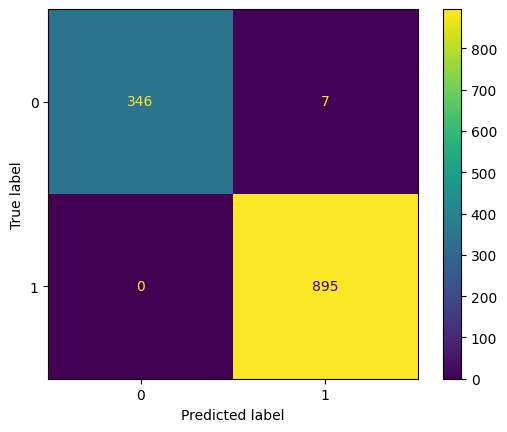

In [168]:
# a traves de metrics importamos las librerias necesarias para la matriz de confucion y el reporte de clasificacion

print("Matriz de confusión:", "\n")
cm_lr = metrics.confusion_matrix(y_test, predictions)
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm_lr,
    display_labels=lr.classes_
)
disp.plot()
plt.show()

In [169]:
print(f"Accuracy obtenida: {round(metrics.accuracy_score(y_test, predictions), 4)}") # mostramos el accuracy del modelo
print(f"Precision obtenida: {round(metrics.precision_score(y_test, predictions), 4)}") # mostramos la precision del modelo
print(f"Recall obtenida: {round(metrics.recall_score(y_test, predictions), 4)}") # mostramos el recall del modelo


Accuracy obtenida: 0.9944
Precision obtenida: 0.9922
Recall obtenida: 1.0


# Sobre el apartado anterior.  

● Utilizar el F1-score para ampliar las conclusiones sobre la 
bondad del modelo.. 

● Si se considera oportuno, entrenar otro modelo alternativo con 
un algoritmo distinto y comparar resultados. 

● Incluir dos gráficos adicionales relevantes para apoyar la 
evaluación.

In [170]:
# F1 score del modelo
print(f"F1 score obtenida: {round(metrics.f1_score(y_test, predictions), 4)}") # mostramos el f1 score del modelo

F1 score obtenida: 0.9961


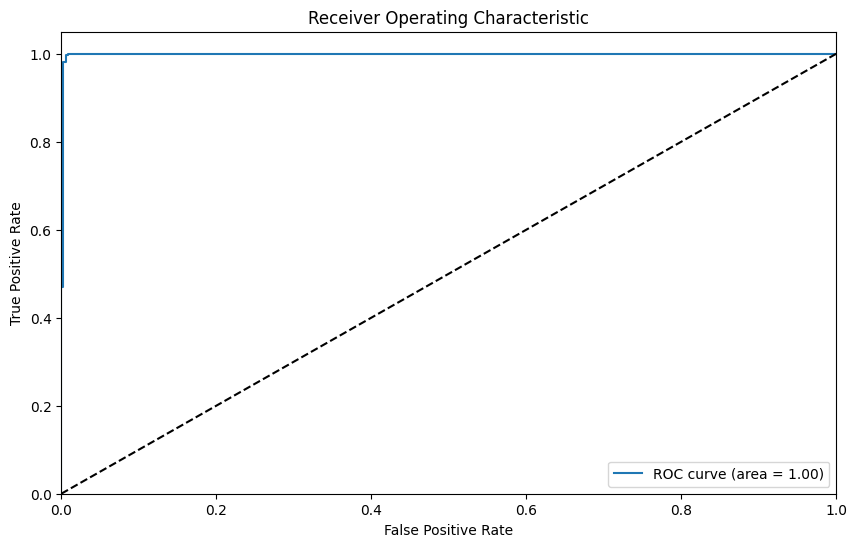

In [171]:
# grafico de la curva ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_probabilities[:, 1]) # calculamos la curva ROC
roc_auc = metrics.auc(fpr, tpr) # calculamos el area bajo la curva ROC
plt.figure(figsize=(10, 6)) # tamaño de la figura
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) # graficamos la curva ROC
plt.plot([0, 1], [0, 1], 'k--') # graficamos la diagonal
plt.xlim([0.0, 1.0]) # limites del eje x
plt.ylim([0.0, 1.05]) # limites del eje y
plt.xlabel('False Positive Rate') # etiqueta del eje x
plt.ylabel('True Positive Rate') # etiqueta del eje y
plt.title('Receiver Operating Characteristic') # titulo de la figura
plt.legend(loc='lower right') # leyenda de la figura
plt.show() # mostramos el grafico

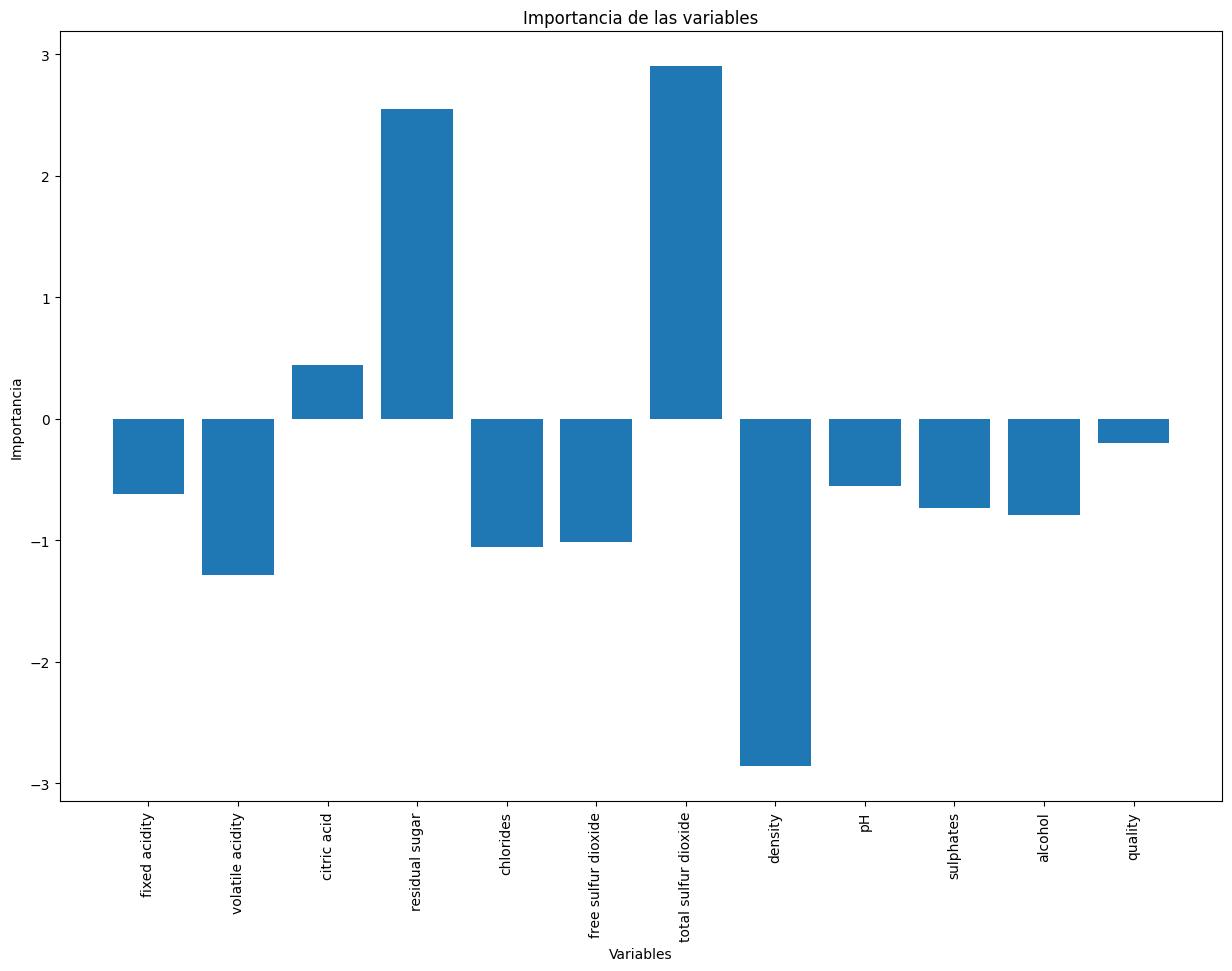

In [172]:
# grafico para ver que variable es la que mas influye en el modelo
plt.figure(figsize=(15,10)) # tamaño de la figura
plt.title('Importancia de las variables') # titulo de la figura
plt.bar(winequality.columns, lr.coef_[0]) # grafico de barras con las variables y su importancia
plt.xticks(rotation=90) # rotamos las etiquetas de los ejes x
plt.xlabel('Variables') # etiqueta del eje x
plt.ylabel('Importancia') # etiqueta del eje y
plt.show() # mostramos el grafico

Otro modelo pero sin la variable de la calidad dado que la calidad en un supuesto no deberia determinar si el vino es tinto o blanco

C:\Users\Claudio\AppData\Local\Temp\ipykernel_10992\4066923777.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_resultados, y='Variable eliminada', x='Accuracy', palette='coolwarm')


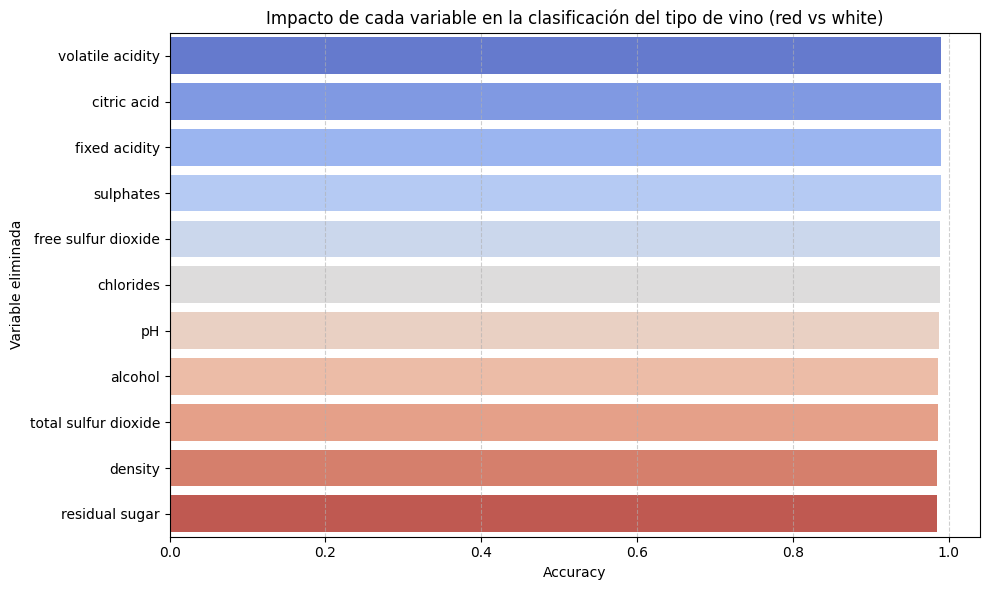

In [173]:
# Cargar ambos datasets y agregar la columna 'type'
red= pd.read_csv(r"C:\Users\Claudio\OneDrive\Escritorio\EAE\Data Science\Practica3.3\3.3.Datos\3.2.winequality\winequality-red.csv",delimiter=";")
white = pd.read_csv(r"C:\Users\Claudio\OneDrive\Escritorio\EAE\Data Science\Practica3.3\3.3.Datos\3.2.winequality\winequality-white.csv",delimiter=";")

red['type'] = 'red'
white['type'] = 'white'

# Unir datasets
wine = pd.concat([red, white], ignore_index=True)

# Variables predictoras
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
             'density', 'pH', 'sulphates', 'alcohol']

# Variable objetivo: tipo de vino
wine['type_bin'] = (wine['type'] == 'red').astype(int)  # 1 = red, 0 = white

# Separación en entrenamiento y prueba
X = wine[variables]
y = wine['type_bin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función para entrenar y evaluar el modelo
def entrenar_modelo(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    return model.score(X_test_scaled, y_test)

# Función para analizar el impacto de eliminar variables
def analizar_eliminacion_variables(X_train, X_test, y_train, y_test, variables):
    resultados = {}
    for var in variables:
        selected_vars = [v for v in variables if v != var]
        acc = entrenar_modelo(X_train[selected_vars], X_test[selected_vars], y_train, y_test)
        resultados[var] = acc
    return resultados

# Ejecutar análisis
resultados = analizar_eliminacion_variables(X_train, X_test, y_train, y_test, variables)

# Visualización
df_resultados = pd.DataFrame(list(resultados.items()), columns=['Variable eliminada', 'Accuracy'])
df_resultados.sort_values(by='Accuracy', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados, y='Variable eliminada', x='Accuracy', palette='coolwarm')
plt.title("Impacto de cada variable en la clasificación del tipo de vino (red vs white)")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [174]:
# devolver el accuracy del modelo
print(f"Accuracy del modelo: {round(entrenar_modelo(X_train, X_test, y_train, y_test), 4)}") # mostramos el accuracy del modelo



Accuracy del modelo: 0.9877
